In [1]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from PIL import Image
from tensorflow import keras
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

Using TensorFlow backend.


In [2]:
def preprocess(image):
    #resized_image = tf.image.resize(image,[224,224])
    final_image=keras.applications.vgg16.preprocess_input(image)
    return final_image


In [3]:
train_datagen = ImageDataGenerator(validation_split = 0.2,preprocessing_function=preprocess)

In [4]:
train_generator = train_datagen.flow_from_directory(
        r'D:\Downloads\Copy of shopee-product-detection-dataset\train\train',
        subset = 'training',# this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=32,
        color_mode="rgb",
        class_mode="categorical",
        shuffle=True,
        seed=42) 


val_generator = train_datagen.flow_from_directory(
        r'D:\Downloads\Copy of shopee-product-detection-dataset\train\train',
        subset = 'validation',# this is the target directo
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=32,
        color_mode="rgb",
        class_mode="categorical",
        shuffle=True,
        seed=42) 


Found 84331 images belonging to 42 classes.
Found 21061 images belonging to 42 classes.


In [5]:
base_model=keras.applications.VGG16(weights="imagenet",include_top=False)

In [6]:
for layer in base_model.layers:
    layer.trainable=False

In [7]:
inputs=keras.Input(shape=(224,224,3))
base_model=base_model(inputs,training=False)

In [8]:
avg=keras.layers.GlobalAveragePooling2D()(base_model)
output=keras.layers.Dense(42,activation="softmax")(avg)
model=keras.Model(inputs=inputs,outputs=output)

In [9]:
optimizer=keras.optimizers.SGD(lr=0.2,momentum=0.9,decay=0.01)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 42)                21546     
Total params: 14,736,234
Trainable params: 21,546
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
history=model.fit(train_generator,epochs=5,validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2636 steps, validate for 659 steps
Epoch 1/5
2636/2636 [==============================] - 7754s 3s/step - loss: 81.7868 - accuracy: 0.5779 - val_loss: 43.1739 - val_accuracy: 0.6108
Epoch 2/5
2636/2636 [==============================] - 1483s 562ms/step - loss: 30.3885 - accuracy: 0.6380 - val_loss: 31.2814 - val_accuracy: 0.6180
Epoch 3/5
2636/2636 [==============================] - 1229s 466ms/step - loss: 22.8666 - accuracy: 0.6474 - val_loss: 26.7090 - val_accuracy: 0.6143
Epoch 4/5
2636/2636 [==============================] - 1239s 470ms/step - loss: 19.2779 - accuracy: 0.6523 - val_loss: 24.2267 - val_accuracy: 0.6129
Epoch 5/5
2636/2636 [==============================] - 1230s 466ms/step - loss: 17.0761 - accuracy: 0.6551 - val_loss: 22.2040 - val_accuracy: 0.6140


In [12]:
base_model.trainable=True
    
optimizer=keras.optimizers.SGD(lr=0.01,nesterov=True,momentum=0.9,decay=0.001)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history=model.fit(train_generator,epochs=50,validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2636 steps, validate for 659 steps
Epoch 1/50
2636/2636 [==============================] - 1286s 488ms/step - loss: 17.8000 - accuracy: 0.6332 - val_loss: 19.5067 - val_accuracy: 0.6127
Epoch 2/50
2636/2636 [==============================] - 1339s 508ms/step - loss: 13.3771 - accuracy: 0.6532 - val_loss: 17.3717 - val_accuracy: 0.6111
Epoch 3/50
2636/2636 [==============================] - 1330s 505ms/step - loss: 11.7829 - accuracy: 0.6575 - val_loss: 16.3173 - val_accuracy: 0.6143
Epoch 4/50
2636/2636 [==============================] - 1342s 509ms/step - loss: 10.8301 - accuracy: 0.6614 - val_loss: 15.5957 - val_accuracy: 0.6069
Epoch 5/50
2636/2636 [==============================] - 1310s 497ms/step - loss: 10.1912 - accuracy: 0.6631 - val_loss: 15.0323 - val_accuracy: 0.6128
Epoch 6/50
2636/2636 [==============================] - 1239s 470ms/step - loss: 9.7380 - accuracy: 0.6644 - val_loss: 14.6051 - val_accuracy: 0.6119


In [13]:
test_datagen = ImageDataGenerator(validation_split = 0.2,preprocessing_function=preprocess)

In [25]:

test_generator = train_datagen.flow_from_directory(
        r'D:\Downloads\Copy of shopee-product-detection-dataset\test',
        # this is the target directo
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=1,
        color_mode="rgb",
        class_mode=None,
        shuffle=False,
        seed=42) 

Found 12192 images belonging to 1 classes.


In [162]:
test_generator[0][0].shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


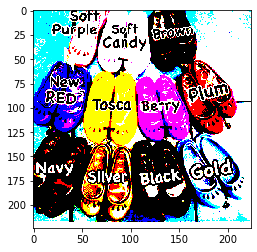

In [166]:
from matplotlib import pyplot as plt
plt.imshow(test_generator[1][0], interpolation='nearest')
plt.show()


In [62]:
test = pd.read_csv(r'D:\Downloads\Copy of shopee-product-detection-dataset\test.csv')

In [63]:
len(test)

12186

In [26]:
predict = model.predict_generator(test_generator,steps = 12192)

In [27]:
predict

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.8123951e-32,
        0.0000000e+00, 1.1975703e-36],
       [3.2850740e-13, 8.9284701e-34, 2.3697658e-11, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.0573128e-35, ..., 5.8397659e-06,
        5.5577628e-05, 4.0868819e-09],
       ...,
       [2.5154182e-38, 0.0000000e+00, 0.0000000e+00, ..., 1.4341272e-24,
        5.8592620e-16, 4.4084902e-21],
       [1.4011687e-38, 0.0000000e+00, 0.0000000e+00, ..., 1.2838761e-26,
        7.5318763e-26, 1.8363538e-27],
       [0.0000000e+00, 0.0000000e+00, 5.4004267e-37, ..., 0.0000000e+00,
        9.1405791e-28, 1.1269988e-34]], dtype=float32)

In [269]:
a = pd.DataFrame(predict)
a

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.753801e-29,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.298558e-35,0.000000e+00,0.000000e+00,1.812395e-32,0.000000e+00,1.197570e-36
1,3.285074e-13,8.928470e-34,2.369766e-11,1.687883e-23,0.0,1.421888e-31,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,7.057313e-35,2.700236e-30,0.0,3.274752e-27,1.139715e-12,5.176672e-27,5.682398e-14,3.785910e-24,...,5.591325e-33,0.000000e+00,8.697151e-12,5.205094e-17,7.599243e-01,2.850452e-30,9.510226e-02,5.839766e-06,5.557763e-05,4.086882e-09
3,3.749531e-34,1.787468e-36,5.069679e-35,0.000000e+00,0.0,1.936048e-38,0.000000e+00,0.000000e+00,2.443096e-28,9.178845e-13,...,0.000000e+00,0.000000e+00,2.518557e-25,2.754715e-37,1.131773e-11,2.063561e-25,1.240158e-12,4.016607e-17,1.229243e-23,1.890447e-10
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.122101e-32,1.195428e-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.583152e-07,0.000000e+00,0.000000e+00,9.998994e-01,6.938138e-07,...,2.175890e-22,1.673090e-33,5.887159e-05,1.733804e-08,1.121411e-08,0.000000e+00,6.932882e-12,8.648138e-06,4.446920e-17,3.831090e-08
12188,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,7.231835e-32,7.592091e-25,1.657290e-26,1.813864e-24,9.831880e-23,...,9.761860e-35,0.000000e+00,0.000000e+00,0.000000e+00,2.557197e-09,9.319163e-21,1.759803e-15,2.551923e-18,1.138498e-05,1.846811e-03
12189,2.515418e-38,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.625318e-27,5.568456e-36,0.000000e+00,8.528133e-09,8.971041e-19,...,4.128253e-29,0.000000e+00,1.025372e-06,9.313636e-07,1.989086e-15,3.333811e-38,2.327226e-14,1.434127e-24,5.859262e-16,4.408490e-21
12190,1.401169e-38,0.000000e+00,0.000000e+00,3.891545e-38,0.0,0.000000e+00,2.000279e-38,6.555138e-37,4.913420e-34,1.364703e-28,...,0.000000e+00,0.000000e+00,0.000000e+00,8.776966e-22,6.335216e-20,0.000000e+00,3.264219e-17,1.283876e-26,7.531876e-26,1.836354e-27


In [266]:
np.argmax(a.iloc[4])

12

In [33]:
import numpy as np
b = np.argmax(predict,axis=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


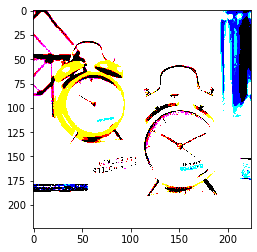

In [270]:
from matplotlib import pyplot as plt
plt.imshow(test_generator[4][0], interpolation='nearest')
plt.show()

In [34]:
lol = pd.DataFrame(b)

In [35]:
lol

,0
0,12
1,16
2,36
3,22
4,12
...,...
12187,8
12188,20
12189,21
12190,23


In [152]:
import tqdm
test = pd.read_csv(r'D:\Downloads\Copy of shopee-product-detection-dataset\test.csv')
test

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,43
12182,efbe41a1c2b666b70e337e438559808b.jpg,43
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,43
12184,ac3d136124617637a05ba66694e381ef.jpg,43


In [55]:

photo_files = []
photo_dir = r'D:\Downloads\Copy of shopee-product-detection-dataset\test\test'
test_image = []
for i in range(test.shape[0]):
    img = image.load_img('D:/Downloads/Copy of shopee-product-detection-dataset/test/test/'+test['filename'][i], target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test_1 = np.array(test_image)

In [277]:
classes_label = []
for i in range(0,42):
    classes_label.append(i)
classes_label

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [284]:
img = image.load_img(r'C:\Users\User\Downloads\WhatsApp Image 2020-09-28 at 04.49.38.jpeg', target_size=(224,224,3), grayscale=False)
img = image.img_to_array(img)
imgs = img.reshape((-1,224,224,3))
#image_to_test = image.img_to_array(img)
#list_of_images = np.expand_dims(image_to_test, axis=0)

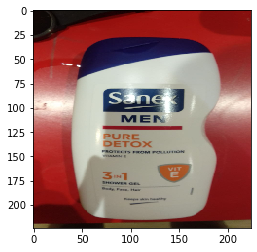

In [285]:


from matplotlib import pyplot as plt
plt.imshow(img/255, interpolation='nearest')
plt.show()

In [286]:
results = model.predict(imgs)

In [287]:
single_result = results[0]
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]
whichclass = classes_label[most_likely_class_index]

In [288]:
whichclass

14

In [289]:
print("This is image is a {} - Likelihood: {:2f}".format(whichclass, class_likelihood))

This is image is a 14 - Likelihood: 0.999990
